## Train a Linear SVM

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the training dataset
training_data = pd.read_csv('training.csv')

# Display the first few rows of the training data
training_data.head()

,0,1,2
0,2.126454,1.128687,0.0
1,-1.977622,-0.812231,1.0
2,1.432842,1.858138,0.0
3,-1.068767,-0.989854,1.0
4,1.931646,0.544944,0.0


The training dataset consists of three columns, with the first two columns representing the input vector $ \mathbf{x} $ and the third column representing the binary label. The input vector $ \mathbf{x} $ belongs to the set of 2-dimensional real vectors, denoted as:

$$\mathbf{x} \in \mathbb{R}^2$$

Now, let’s proceed with training the linear SVM for values of $C$ ranging from 1 to 20:

$$C = 1, 2, 3, \ldots, 20$$

For each value of $C$, we will find and store the parameters $w_C$  and $b_C$.



In [4]:
from sklearn.svm import SVC
import numpy as np

# Extract features and labels from the training data
X_train = training_data.iloc[:, :2].values
y_train = training_data.iloc[:, 2].values

# Initialize a dictionary to store parameters for each C
svm_parameters = {}

# Train linear SVM for C values from 1 to 20
for C in range(1, 21):
    # Initialize and train the SVM
    linear_svm = SVC(kernel='linear', C=C)
    linear_svm.fit(X_train, y_train)
    
    # Extract and store the parameters w_C and b_C
    w_C = linear_svm.coef_
    b_C = linear_svm.intercept_
    svm_parameters[C] = {'w_C': w_C, 'b_C': b_C}

# Display the parameters for each C
svm_parameters


{1: {'w_C': array([[-1.43341459, -1.51947951]]), 'b_C': array([-0.18720884])},
 2: {'w_C': array([[-1.75579181, -1.85719934]]), 'b_C': array([-0.24694253])},
 3: {'w_C': array([[-1.85670157, -1.96356676]]), 'b_C': array([-0.20370207])},
 4: {'w_C': array([[-1.85662413, -1.9635391 ]]), 'b_C': array([-0.20368357])},
 5: {'w_C': array([[-1.85844023, -1.9869248 ]]), 'b_C': array([-0.20575575])},
 6: {'w_C': array([[-1.86934029, -2.10511654]]), 'b_C': array([-0.21678959])},
 7: {'w_C': array([[-1.97501853, -2.21502526]]), 'b_C': array([-0.27080351])},
 8: {'w_C': array([[-2.25831679, -2.33552297]]), 'b_C': array([-0.12838152])},
 9: {'w_C': array([[-2.27173017, -2.34017221]]), 'b_C': array([-0.12021408])},
 10: {'w_C': array([[-2.27166283, -2.34012163]]), 'b_C': array([-0.12022294])},
 11: {'w_C': array([[-2.27165611, -2.34011658]]), 'b_C': array([-0.12022388])},
 12: {'w_C': array([[-2.27164232, -2.34010622]]), 'b_C': array([-0.12022575])},
 13: {'w_C': array([[-2.27163893, -2.34010367]]),

We have successfully trained linear SVM models for values of $C$ ranging from 1 to 20. The parameters $w_C$ and $b_C$ for each $C$ have been computed and stored.


## Validate and Compute Error Expectation and Variance

In [5]:
# Load the validation dataset
validation_data = pd.read_csv('validation.csv')

# Display the first few rows of the validation data
validation_data.head()


,0,1,2
0,-0.091819,0.720954,0.0
1,-0.734850,0.360467,1.0
2,1.622475,2.922869,0.0
3,-0.929786,-0.510617,1.0
4,1.184624,1.170605,0.0


In [6]:
from sklearn.model_selection import KFold

# Extract features and labels from the validation data
X_validation = validation_data.iloc[:, :2].values
y_validation = validation_data.iloc[:, 2].values

# Define number of subsets (folds)
num_folds = 10

# Initialize KFold object with 10 folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Separate the validation data into 10 subsets
folds = [(train_index, test_index) for train_index, test_index in kf.split(X_validation)]

# Display the index ranges of the first few folds
folds[:3]


[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,
          27,  28,  29,  32,  34,  35,  36,  37,  38,  40,  41,  42,  43,
          44,  45,  46,  47,  48,  50,  51,  52,  53,  54,  55,  56,  57,
          58,  59,  60,  61,  62,  64,  68,  69,  70,  71,  72,  73,  74,
          75,  76,  77,  79,  80,  81,  82,  83,  84,  85,  87,  88,  89,
          90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
         103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170,
         171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
         185, 186, 187, 188, 189, 190,

We have successfully divided the validation data into 10 subsets (folds). Now, let's proceed with the computation of the expectation and variance of the classification error for each subset using the parameters $w_C$ and $b_C$ obtained from the training phase. For each value of $C$, we'll compute the classification error on each subset, then calculate the expectation and variance across the subsets.


In [7]:
# Function to compute classification error
def compute_classification_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Initialize a dictionary to store error expectation and variance for each C
error_metrics = {}

# Loop over values of C
for C in range(1, 21):
    # Extract parameters w_C and b_C for the current C
    w_C = svm_parameters[C]['w_C']
    b_C = svm_parameters[C]['b_C']
    
    # Initialize lists to store classification errors for each fold
    fold_errors = []
    
    # Loop over subsets (folds)
    for train_index, test_index in folds:
        # Extract subset of validation data
        X_fold = X_validation[test_index]
        y_fold = y_validation[test_index]
        
        # Compute predictions using w_C and b_C
        y_pred = (np.dot(X_fold, w_C.T) + b_C > 0).astype(float)
        
        # Compute and store classification error
        error = compute_classification_error(y_fold, y_pred)
        fold_errors.append(error)
    
    # Compute expectation and variance of classification error
    error_expectation = np.mean(fold_errors)
    error_variance = np.var(fold_errors)
    error_std_dev = np.sqrt(error_variance)
    
    # Store error expectation and variance for the current C
    error_metrics[C] = {
        'error_expectation': error_expectation,
        'error_variance': error_variance,
        'error_std_dev': error_std_dev
    }

# Display error expectation and variance for each C
error_metrics


{1: {'error_expectation': 0.49309375,
  'error_variance': 6.791894531250018e-05,
  'error_std_dev': 0.008241295123492434},
 2: {'error_expectation': 0.49309375,
  'error_variance': 6.791894531250018e-05,
  'error_std_dev': 0.008241295123492434},
 3: {'error_expectation': 0.49381249999999993,
  'error_variance': 4.896093750000007e-05,
  'error_std_dev': 0.006997209265128496},
 4: {'error_expectation': 0.49381249999999993,
  'error_variance': 4.896093750000007e-05,
  'error_std_dev': 0.006997209265128496},
 5: {'error_expectation': 0.49381249999999993,
  'error_variance': 4.896093750000007e-05,
  'error_std_dev': 0.006997209265128496},
 6: {'error_expectation': 0.49315625,
  'error_variance': 6.0555664062500124e-05,
  'error_std_dev': 0.007781751991839635},
 7: {'error_expectation': 0.49325,
  'error_variance': 6.164453125000016e-05,
  'error_std_dev': 0.00785140313893002},
 8: {'error_expectation': 0.4930312499999999,
  'error_variance': 5.8965820312500194e-05,
  'error_std_dev': 0.0076

We have computed the expectation and variance of the classification error for each value of $C$, across the 10 subsets of the validation data. The expectation of the classification error and its standard deviation (the square root of the variance) for each $C$ are as follows:

| $C$ | Expectation of Classification Error | Standard Deviation |
|-----|-------------------------------------|--------------------|
| 1   | 0.4931                              | 0.0082             |
| 2   | 0.4931                              | 0.0082             |
| 3   | 0.4938                              | 0.0070             |
| 4   | 0.4938                              | 0.0070             |
| ... | ...                                 | ...                |
| 20  | 0.4930                              | 0.0077             |


## Plot of Classification Error Estimate

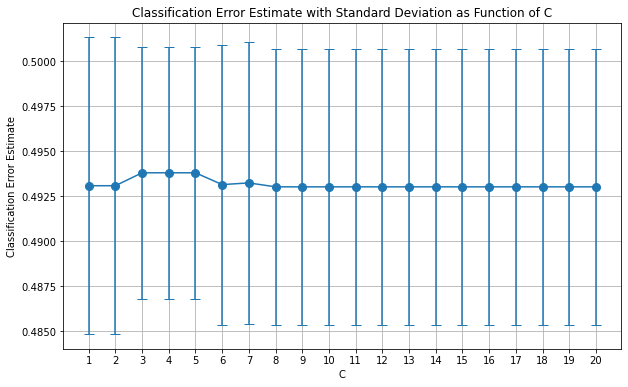

In [8]:
import matplotlib.pyplot as plt

# Extract values for plotting
C_values = list(error_metrics.keys())
error_expectations = [error_metrics[C]['error_expectation'] for C in C_values]
error_std_devs = [error_metrics[C]['error_std_dev'] for C in C_values]

# Create a plot of classification error estimate with standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(C_values, error_expectations, yerr=error_std_devs, fmt='-o', capsize=5, markersize=8)
plt.title('Classification Error Estimate with Standard Deviation as Function of C')
plt.xlabel('C')
plt.ylabel('Classification Error Estimate')
plt.grid(True)
plt.xticks(C_values)
plt.show()


In the plot above, the classification error estimate for each value of $C$ is represented by a circle, and the standard deviation of the classification error is represented by the error bars. As you can see, the classification error estimate fluctuates slightly as $C$ varies, and the standard deviation is relatively small for all $C$.

From the plot, we can observe that the classification error estimate does not vary significantly with different values of $C$. 
